In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Corpus/corpus_stemmed_more3.csv')
df['text'] = df['text'].astype(str)
df['label'] = pd.to_numeric(df['label'])
df

,text,label
0,лива туввар сири алла islamstate қарс ұрыс баст,1
1,терр итте бүлі айна turkey pkk twitterkurds t,1
2,әлха газва арна айма олар кейі олар алепп қайт...,1
3,сири ресе n басы кіру тура алаң кіру мүмкін ем...,1
4,ядролық соғы соғы келе жаты,1
...,...,...
11676,"қарт шаққа дейі өмір сүре кепіл бере бе жоқ, е...",0
11677,ан оқып үйре сіз үшін бүгі кере ұсын бар курс ...,0
11678,таз жеке текс қада толы ақпа алу үшін сілте өт...,0
11679,а таға кеші тіле шүкір ете отыр рабб пәкт ұлық...,0


In [3]:
df.nunique()

text     10329
label        2
dtype: int64

In [4]:
len(list(set(" ".join(df.text.tolist()).split(" "))))

12286

In [5]:
df.loc[df['label'] == 1]

,text,label
0,лива туввар сири алла islamstate қарс ұрыс баст,1
1,терр итте бүлі айна turkey pkk twitterkurds t,1
2,әлха газва арна айма олар кейі олар алепп қайт...,1
3,сири ресе n басы кіру тура алаң кіру мүмкін ем...,1
4,ядролық соғы соғы келе жаты,1
...,...,...
1180,кәпір жиһа қолд ана жақт мұсыл қыры жаты ал се...,1
1181,мен алла жолы соғы үшін бард ғой қаза орал тур...,1
1182,"в игил мы жили хорошо,грабили,насилова ли,соби...",1
1183,джиха ол битва за веру мудж сол джиха катысушы...,1


In [6]:
df.loc[df['label'] == 0]

,text,label
1185,"ғамбар арты еру, бұл бізд ең баст мақсат ал, ғ...",0
1186,әнданған кезд шоқын кере деген сияқты сөзд дін...,0
1187,ақ асса алай уа раxм уа бара құпта нама мешіт ...,0
1188,"ақ егер біре не үшін нама оқу кере , деп сұра ...",0
1189,"ақ ибн баз, ибн усаймин, альб бұла мүшр ме жау...",0
...,...,...
11676,"қарт шаққа дейі өмір сүре кепіл бере бе жоқ, е...",0
11677,ан оқып үйре сіз үшін бүгі кере ұсын бар курс ...,0
11678,таз жеке текс қада толы ақпа алу үшін сілте өт...,0
11679,а таға кеші тіле шүкір ете отыр рабб пәкт ұлық...,0


# Learning algorithms

In [7]:
ext = df.loc[df['label'] == 1].values.tolist()
neu = df.loc[df['label'] == 0].values.tolist()[:1185]
balanced = pd.DataFrame(ext+neu, columns = ['text', 'label'])
balanced

,text,label
0,лива туввар сири алла islamstate қарс ұрыс баст,1
1,терр итте бүлі айна turkey pkk twitterkurds t,1
2,әлха газва арна айма олар кейі олар алепп қайт...,1
3,сири ресе n басы кіру тура алаң кіру мүмкін ем...,1
4,ядролық соғы соғы келе жаты,1
...,...,...
2365,ббылары тара өздер сенд еске үшін бір кісі нас...,0
2366,р сен бізге жалғ ғана алла құлшы қылу және ата...,0
2367,д ғ с рабб тара азап және ашу тиіс болды алла ...,0
2368,"да һұд ғ с ты, онымен бірге болғ мәрхамет құтқ...",0


In [8]:
balanced['category'] = balanced['label'].apply(lambda x: "extremist" if x==1 else "neutral")
balanced

,text,label,category
0,лива туввар сири алла islamstate қарс ұрыс баст,1,extremist
1,терр итте бүлі айна turkey pkk twitterkurds t,1,extremist
2,әлха газва арна айма олар кейі олар алепп қайт...,1,extremist
3,сири ресе n басы кіру тура алаң кіру мүмкін ем...,1,extremist
4,ядролық соғы соғы келе жаты,1,extremist
...,...,...,...
2365,ббылары тара өздер сенд еске үшін бір кісі нас...,0,neutral
2366,р сен бізге жалғ ғана алла құлшы қылу және ата...,0,neutral
2367,д ғ с рабб тара азап және ашу тиіс болды алла ...,0,neutral
2368,"да һұд ғ с ты, онымен бірге болғ мәрхамет құтқ...",0,neutral


In [48]:
X_train, X_test, y_train, y_test = train_test_split(balanced['text'], balanced['label'], random_state=1, test_size = 0.1)

In [49]:
len(X_test)

237

In [50]:
#vectorizer = CountVectorizer(lowercase=True)
vectorizer = TfidfVectorizer(lowercase=True)
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

# MultinomialNB

Accuracy score: 0.9831223628691983
Precision score: 1.0
Recall score: 0.9672131147540983
F1 score: 0.9833333333333333


Text(238.76, 0.5, 'predicted label')

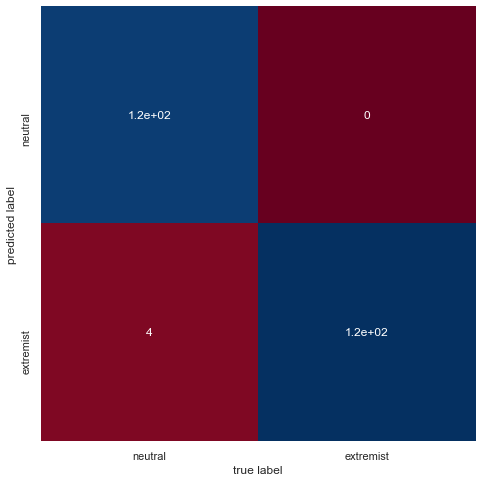

In [51]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [52]:
val = vectorizer.transform(['айма олар алла '])
naive_bayes.predict(val)

array([1], dtype=int64)

# GaussianNB

Accuracy score: 0.9282700421940928
Precision score: 0.9058823529411765
Recall score: 0.9585062240663901
F1 score: 0.9314516129032259


Text(91.68, 0.5, 'predicted label')

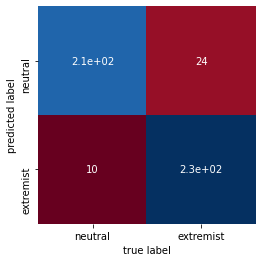

In [16]:
classifier = GaussianNB()
classifier.fit(X_train_cv.toarray(),y_train)
#predition
pred=classifier.predict(X_test_cv.toarray())
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred)))
print('Recall score: {}'.format(recall_score(y_test, pred)))
print('F1 score: {}'.format(f1_score(y_test, pred)))

sns.heatmap(confusion_matrix(y_test, pred), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

# RandomForestClassifier

Accuracy score: 0.959915611814346
Precision score: 0.9911504424778761
Recall score: 0.9294605809128631
F1 score: 0.9593147751605996


Text(91.68, 0.5, 'predicted label')

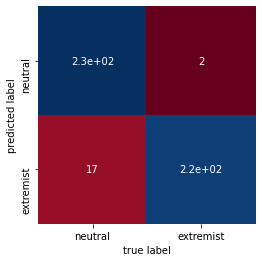

In [17]:
classifier1=RandomForestClassifier(n_estimators=100,criterion='entropy')
classifier1.fit(X_train_cv.toarray(),y_train)
predRF=classifier1.predict(X_test_cv.toarray())
print('Accuracy score: {}'.format(accuracy_score(y_test, predRF)))
print('Precision score: {}'.format(precision_score(y_test, predRF)))
print('Recall score: {}'.format(recall_score(y_test, predRF)))
print('F1 score: {}'.format(f1_score(y_test, predRF)))

sns.heatmap(confusion_matrix(y_test, predRF), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

[Text(0, 0, 'MultinomialNB'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'RandomForestClassifier')]

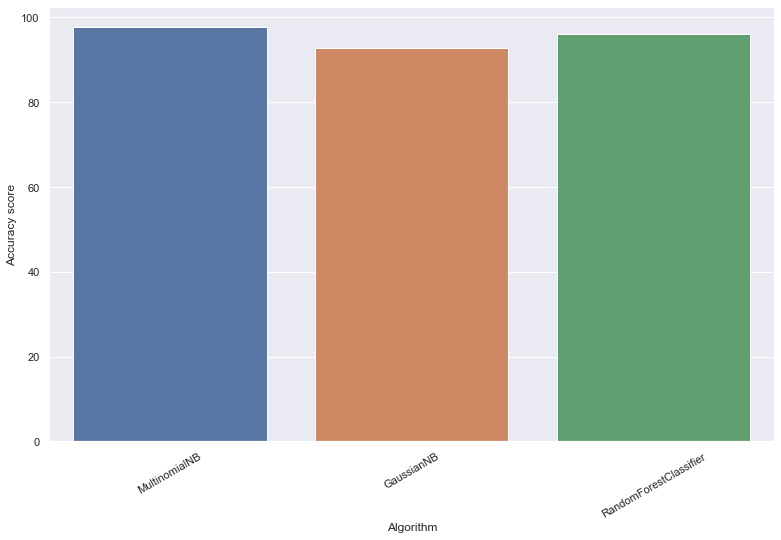

In [18]:
lasted = pd.DataFrame([['MultinomialNB', accuracy_score(y_test, predictions)*100], 
                       ['GaussianNB', accuracy_score(y_test, pred)*100], 
                       ['RandomForestClassifier', accuracy_score(y_test, predRF)*100]],
                     columns = ['Algorithm', 'Accuracy score'])
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Algorithm", y="Accuracy score", data=lasted)
g.set_xticklabels(g.get_xticklabels(), rotation=30)